<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW12/Image_k_means_clustering_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import cm
import imageio as io
from sklearn.cluster  import KMeans
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/PUS2020/

/content/drive/Shareddrives/PUS2020


 read in an image of madrid stored in the PUS2020 shared drive as "data/Madrid.jpg" and preprocess it appropriately for clustering

In [ ]:
op = io.imread('data/Madrid.jpg')


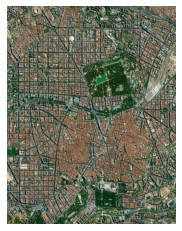

In [ ]:
pl.imshow(op)
pl.axis('off');

Figure 1: Aerial image of Madrid.

In [ ]:
# make sure the image only contains 3 color channels:
op.shape

(1000, 774, 3)

In [ ]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
d0 = preprocessing.minmax_scale(op[:,:,0])
d1 = preprocessing.minmax_scale(op[:,:,1])
d2 = preprocessing.minmax_scale(op[:,:,2])
Xopscaled = np.dstack((d0, d1, d2))
Xopscaled.shape

(1000, 774, 3)

In [ ]:
Xopscaled

array([[[0.72941176, 0.47736626, 0.35102041],
        [0.61788618, 0.63478261, 0.63942308],
        [0.66798419, 0.65966387, 0.65350877],
        ...,
        [0.29527559, 0.26339286, 0.24423963],
        [0.54901961, 0.42682927, 0.33870968],
        [0.48627451, 0.37394958, 0.36326531]],

       [[0.81176471, 0.6090535 , 0.49795918],
        [0.6504065 , 0.66086957, 0.62019231],
        [0.27272727, 0.33193277, 0.36842105],
        ...,
        [0.51181102, 0.40625   , 0.29953917],
        [0.34901961, 0.29674797, 0.22983871],
        [0.22352941, 0.14705882, 0.13877551]],

       [[0.87843137, 0.70781893, 0.62857143],
        [0.6300813 , 0.66521739, 0.63942308],
        [0.12252964, 0.17647059, 0.22368421],
        ...,
        [0.58661417, 0.44196429, 0.36866359],
        [0.69019608, 0.47560976, 0.34677419],
        [0.58039216, 0.40336134, 0.31020408]],

       ...,

       [[0.22745098, 0.16460905, 0.12653061],
        [0.26829268, 0.28695652, 0.14903846],
        [0.56521739, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


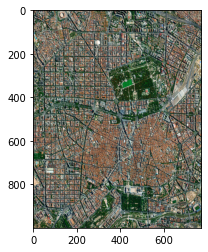

In [ ]:
#show the prepreocessed image
pl.imshow(Xopscaled)

Figure 2: Aerial image of Madrid after rescaling values to 0-1.

In [ ]:
w, h, d = original_shape = tuple(Xopscaled.shape)
Xopscaled1 = np.reshape(Xopscaled, (w * h, d))
Xopscaled1.shape

(774000, 3)

# cluster with k-means in 4 clusters, let the center initialization be whatever sklearn think is best (kmeans++)



In [ ]:
nclusters = 4

In [ ]:
kmop = KMeans(nclusters)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

print the cluster cluster centers and verbalize what they represent : remember: your features are the R, G, and B channel in the image.

In [ ]:
cluster_centers = kmop.cluster_centers_
cluster_labels = kmop.labels_

In [ ]:
kmop.cluster_centers_

array([[0.08432307, 0.17244797, 0.12370341],
       [0.76875606, 0.73179885, 0.67082906],
       [0.33722128, 0.3665391 , 0.3232051 ],
       [0.59607979, 0.51568945, 0.43808533]])

These cluster centers represent the four cluster center rescaled values for each color channel.

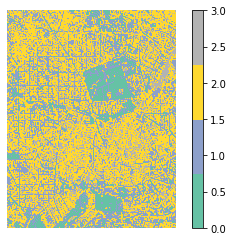

In [ ]:
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

Figure 3: Clustering of madrid based on k means clustering with kmeans ++ and four cluster centers. Cluster 0 appears to contain most of the vegetated areas. Cluster 3 appears to cover some roads while cluster 2 contains most buildings. Cluster 1 is hard to distinguish but may cover some bare soil areas.


By rerunning this clustering different results are achieved each time.

# identify from the image the cluster containing the green patch on the botton left and assuming the clustering picked up the greenery calculate the fraction of pixels containing vegetation in the image

In [ ]:
veg = np.sum(cluster_labels == 0)
tot = np.sum(cluster_labels < 4)
n_veg = veg/tot
print("fraction of vegetation pixel {:.3f}".format(n_veg))

fraction of vegetation pixel 0.293


Cluster number 0 contains the vegetated areas.

cluster again, with 4 clusters, but now give it the center corresponding to pure colors:
remember that each pixel color is encoded by the intensity of the R G and B channel:

pure red => RGB=[1,0,0]

pure green => RGB=[0,1,0]

pure blue => RGB=[0,0,1]

also add a pixel centered on black

white: RGB=[1,1,1]

black: RGB=[0,0,0]


In [ ]:
cents = np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,0]])
cents

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [ ]:
kmop = KMeans(n_clusters=nclusters, init=(cents), n_init=1)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True,
       init=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]]),
       max_iter=300, n_clusters=4, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmop.cluster_centers_

array([[0.60499193, 0.52171771, 0.44277543],
       [0.77229644, 0.7373799 , 0.67749857],
       [0.34581216, 0.37221613, 0.32876983],
       [0.08681878, 0.17453387, 0.1256643 ]])

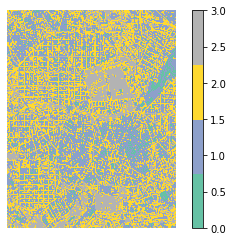

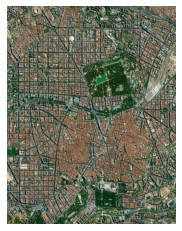

In [ ]:
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(op)
pl.axis('off');

Figure 4: The clustered image of Madrid using red, green, blue, and black as the initial cluster centers. Here, cluster 3 appears to contain the vegetated areas. Cluster 2 contains the roads and some buildings. While 1 contains most other buildings and 0 is bare soil areas.


Even when run multiple times, the result of this cluster is still the same, as random centers are being eliminated.



In [ ]:
veg = np.sum(cluster_labels == 3)
tot = np.sum(cluster_labels < 4)
n_veg = veg/tot
print("fraction of vegetation pixel {:.3f}".format(n_veg))

fraction of vegetation pixel 0.289


Vegetated values are now in cluster 3.

The results from both initilization methods are very similar with .293 of the pixels being vegetated with kmeans++ compared to .289 with pure rgb and black color centers. Most areas appear to be classified as a greenery cluster with the first method as with the second method.

looking at the maps, identify some clusters that were associated with greenery in the first map (same cluster as the big triangular park bottom left) and are not associated with greenery in the second, or viceversa.

discuss the results 

look at the "elbow plot" below: does it suggest a best number of clusters? https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

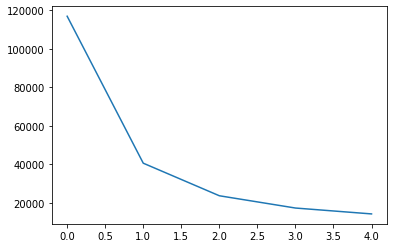

In [ ]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled1)
  inertias.append(kmop.inertia_)

pl.plot(inertias)

Figure 5: An elbow plot for the kmeans clustering on the Madrid image using 1-5 cluster centers. It is hard to determine an ideal number of clusters from this plot. There appears to be a sharp elbow after 2 clusters, indicating that two clusters might be ideal.

repeat the exercize with this image of california after the fires: what is the fraction of forest that burned in this image?

In [6]:
forest = io.imread("data/kalbar_drone_190113-768x512.jpg") 

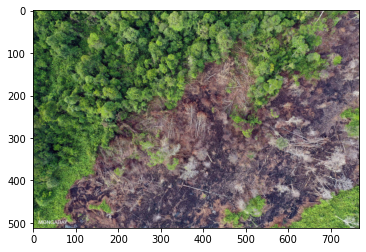

In [7]:
pl.imshow(forest)

Figure 6: Image of a burned forest in California.

In [8]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
d0 = preprocessing.minmax_scale(forest[:,:,0])
d1 = preprocessing.minmax_scale(forest[:,:,1])
d2 = preprocessing.minmax_scale(forest[:,:,2])
Xopscaled = np.dstack((d0, d1, d2))
Xopscaled.shape

(512, 768, 3)

In [9]:
w, h, d = original_shape = tuple(Xopscaled.shape)
Xopscaled1 = np.reshape(Xopscaled, (w * h, d))
Xopscaled1.shape

(393216, 3)

In [ ]:
nclusters = 4
kmop = KMeans(nclusters)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_centers = kmop.cluster_centers_
cluster_labels = kmop.labels_

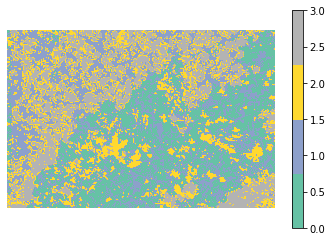

In [ ]:
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(forest.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

Figure 7: Kmeans clustering on the California forest using 4 cluster centers. Cluster 0 contains burned forest area. Clusters 1-3 contain most of the un-burned green trees.


Running this multiple times will produce different results, most likely due to the initilization process.

In [ ]:
burn = np.sum(cluster_labels == 0)
tot = np.sum(cluster_labels < 4)
n_burn = burn/tot
print("fraction of burned forest pixels {:.3f}".format(n_burn))

fraction of burned forest pixels 0.252


In [39]:
cents = np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,0]])
nclusters = 4
kmop = KMeans(n_clusters=nclusters, init=(cents), n_init=1)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True,
       init=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]]),
       max_iter=300, n_clusters=4, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [40]:
kmop.cluster_centers_

array([[0.7412008 , 0.70248823, 0.65743453],
       [0.46620182, 0.62147376, 0.31878942],
       [0.49842493, 0.40246479, 0.47506818],
       [0.22925599, 0.26138141, 0.23605185]])

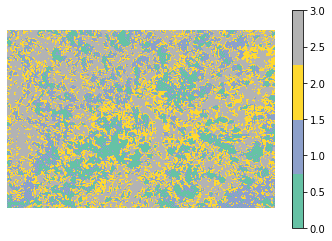

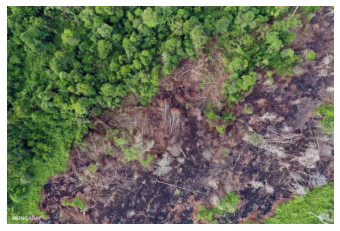

In [41]:
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(forest.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(forest)
pl.axis('off');

Figure 8: Clustering with the pure colors did not achieve a result in which burned areas were classified with this image. Even when run multiple times, this will produce the same result because of the initilization process.